TALLERES SEMANALES SEBASTIAN ALBARRACIN SILVA OBSERVABLES Y MEDIDAS

Teoría cuántica básica, Observables y Medidas

Simule el primer sistema cuántico descrito en la sección 4.1.

El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1.El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.


RTA:

In [1]:
import numpy as np

def norma(a):
    norma = np.linalg.norm(a)
    return norma

def probabilidad_posicion(ket, position):
    numerador = norma(ket[position]) ** 2
    denominador = norma(ket) ** 2
    return numerador /denominador


def main():
    ket = np.array([[-2+3j], [1-2.5j], [1+1j], [0+3j]])
    probabilidad = probabilidad_posicion(ket, 2)
    print("La probabilidad de encontrar la particula en la posicion dada es:", probabilidad*100, "%")
main()

La probabilidad de encontrar la particula en la posicion dada es: 6.4 %


2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.

RTA:

In [2]:
import numpy as np
def transition_probability(ket1, ket2):
    
    producto_interno = np.vdot(ket2, ket1)
    
    transition_prob = np.abs(producto_interno)**2
    
    return transition_prob
def main():
    ket1 = np.array([[2-1j], [0+3j]])
    ket2 = np.array([[1+1j], [2-1.2j]])
    transicion_f = transition_probability(ket1, ket2)
    print(f"La probabilidad de transitar del vector {ket1} al vector {ket2} es:", transicion_f)
main()

La probabilidad de transitar del vector [[2.-1.j]
 [0.+3.j]] al vector [[1.+1.j ]
 [2.-1.2j]] es: 15.760000000000002


Complete los retos de programación del capítulo 4.

1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

RTA:

In [3]:
import numpy as np

def is_normalized(ket, tol=1e-10):

    norm = np.linalg.norm(ket)
    return np.abs(norm - 1) < tol

def normalizado(ket):
    
    if not is_normalized(ket):
        ket = normalize(ket)
    return ket

def normalize(ket):

    norm = np.linalg.norm(ket)
    
    return ket / norm


def transition_amplitude(ket1, ket2):
    
    # Producto interno ⟨ket2|ket1⟩, que es la amplitud de transición
    amplitude = np.vdot(ket2, ket1)
    
    return amplitude

def main():
    ket1 = np.array([[2-1j], [0+3j]])
    ket2 = np.array([[1+1j], [2-1.2j]])

    ket1=normalizado(ket1)
    ket2=normalizado(ket2)

    amplitude = transition_amplitude(ket1, ket2)
    print(f"Amplitud de transición ⟨ket2|ket1⟩: {amplitude}")
main()

Amplitud de transición ⟨ket2|ket1⟩: (-0.2547550855426266+0.29394817562610775j)


2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

RTA:

In [4]:
import numpy as np

def is_hermitian(matrix, tol=1e-10):
    return np.allclose(matrix, np.conjugate(matrix.T), atol=tol)

def expectation_value(matrix, ket):
    return np.vdot(ket, np.dot(matrix, ket))

def variance(matrix, ket):

    expectation = expectation_value(matrix, ket)
    
    matrix_squared = np.dot(matrix, matrix)
    expectation_squared = expectation_value(matrix_squared, ket)
    
    variance = expectation_squared - np.abs(expectation)**2
    
    return variance

observable = np.array([[1, 2j, 0],
                       [-2j, 3, 0],
                       [0, 0, 2]])

ket = [1+0j, 3+1j, 1+1j]

if is_hermitian(observable):
    print("La matriz es hermitiana.")
    
    expected_value = expectation_value(observable, ket)
    print(f"Valor esperado ⟨A⟩: {expected_value}")
    
    var = variance(observable, ket)
    print(f"Varianza: {var}")
else:
    print("La matriz no es hermitiana.")

La matriz es hermitiana.
Valor esperado ⟨A⟩: (31+0j)
Varianza: (-834+0j)


3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

RTA:

In [5]:
import numpy as np

def is_hermitian(matrix, tol=1e-10):
    return np.allclose(matrix, np.conjugate(matrix.T), atol=tol)

def eigenvalues_and_eigenvectors(matrix):
    
    eigenvalues, eigenvectors = np.linalg.eigh(matrix)  # eigh para matrices hermitianas
    return eigenvalues, eigenvectors

def transition_probabilities_to_eigenstates(ket, eigenvectors):

    ket = np.array(ket, dtype=complex)
    probabilities = []
    
    for eigenvector in eigenvectors.T:
        amplitude = np.vdot(eigenvector, ket)  # Producto interno entre el ket y el vector propio
        probability = np.abs(amplitude)**2  # Probabilidad es el valor absoluto al cuadrado
        probabilities.append(probability)
    
    return probabilities


observable = np.array([[1, 2j, 0],
                       [-2j, 3, 0],
                       [0, 0, 2]])

ket = [1+0j, 2+1j, 3+0j]

if is_hermitian(observable):
    print("La matriz es hermitiana.")
    
    eigenvalues, eigenvectors = eigenvalues_and_eigenvectors(observable)
    print(f"Valores propios: {eigenvalues}")
    print(f"Vectores propios:\n{eigenvectors}")
    
    transition_probs = transition_probabilities_to_eigenstates(ket, eigenvectors)
    
    for i, prob in enumerate(transition_probs):
        print(f"Probabilidad de transitar al vector propio {i}: {prob}")
else:
    print("La matriz no es hermitiana.")

La matriz es hermitiana.
Valores propios: [-0.23606798  2.          4.23606798]
Vectores propios:
[[-0.85065081+0.j          0.        +0.j          0.52573111+0.j        ]
 [ 0.        -0.52573111j  0.        +0.j          0.        -0.85065081j]
 [ 0.        +0.j          1.        +0.j          0.        +0.j        ]]
Probabilidad de transitar al vector propio 0: 2.9999999999999987
Probabilidad de transitar al vector propio 1: 9.0
Probabilidad de transitar al vector propio 2: 2.9999999999999987


4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

RTA:


In [7]:
import numpy as np

def calcular_estado_final(estado_inicial, matrices_unitarias):
    estado_actual = estado_inicial
    for matriz_unitaria in matrices_unitarias:
        estado_actual = np.dot(matriz_unitaria, estado_actual)
    return estado_actual

estado_inicial = np.array([1, 0])  
matrices_unitarias = [np.array([[0, 1], [1, 0]]), 
                      np.array([[1, 0], [0, 1]])]

estado_final = calcular_estado_final(estado_inicial, matrices_unitarias)
print("El estado final del sistema es:", estado_final)

El estado final del sistema es: [0 1]


4.3.1

RTA:

In [8]:
import numpy as np

# Estado inicial
estado_inicial = np.array([1, 0])

# Matriz del operador Sx (spin en x)
Sx = np.array([[0, 1], [1, 0]])

# Aplicación del operador Sx al estado inicial
estado_resultante = np.dot(Sx, estado_inicial)

# Cálculo de la probabilidad de spin up y spin down
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Imprimir los resultados
print("Probabilidad de transición en spin up:", probabilidad_spin_up)
print("Probabilidad de transición en spin down:", probabilidad_spin_down)

Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


4.3.2

RTA:

Probabilidad de transición en spin up: 0
Probabilidad de transición en spin down: 1


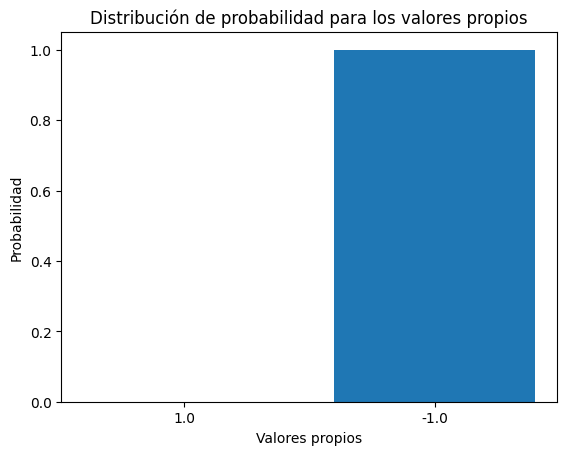

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Estado inicial
estado_inicial = np.array([1, 0])

# Operador Sy (spin en y)
Sy = np.array([[0, 1], [1, 0]])

# Aplicación del operador Sy al estado inicial
estado_resultante = np.dot(Sy, estado_inicial)

# Cálculo de la probabilidad de spin up y spin down
probabilidad_spin_up = abs(estado_resultante[0])**2
probabilidad_spin_down = abs(estado_resultante[1])**2

# Imprimir los resultados
print("Probabilidad de transición en spin up:", probabilidad_spin_up)
print("Probabilidad de transición en spin down:", probabilidad_spin_down)

# Cálculo de los valores propios del operador Sy
valores_propios, _ = np.linalg.eig(Sy)

# Gráfico de la distribución de probabilidad para los valores propios
plt.bar(np.arange(len(valores_propios)), abs(estado_resultante)**2)
plt.xticks(np.arange(len(valores_propios)), valores_propios)
plt.xlabel('Valores propios')
plt.ylabel('Probabilidad')
plt.title('Distribución de probabilidad para los valores propios')
plt.show()

4.4.1

RTA:

In [10]:
import numpy as np

# Matrices U1 y U2
U1 = np.array([[0, 1], [1, 0]])
U2 = np.array([[np.sqrt(2)/2, np.sqrt(2)/2], [np.sqrt(2)/2, -np.sqrt(2)/2]])

# Verificación de unitariedad de U1
unitaria_U1 = "es" if np.allclose(np.dot(U1.conj().T, U1), np.eye(2)) else "no es"

# Verificación de unitariedad de U2
unitaria_U2 = "es" if np.allclose(np.dot(U2.conj().T, U2), np.eye(2)) else "no es"

# Producto de U1 y U2
producto_U1_U2 = np.dot(U1, U2)

# Verificación de unitariedad del producto
producto_unitario = "es" if np.allclose(np.dot(producto_U1_U2.conj().T, producto_U1_U2), np.eye(2)) else "no es"

# Resultados
print("U1", unitaria_U1, "unitaria")
print("U2", unitaria_U2, "unitaria")
print("El producto de U1 y U2", producto_unitario, "unitario")

U1 es unitaria
U2 es unitaria
El producto de U1 y U2 es unitario


4.4.2

RTA:

In [11]:
import numpy as np

# Mapa
mapa = np.array([
    [0, 1/np.sqrt(2), 1/np.sqrt(2), 0],
    [1j/np.sqrt(2), 0, 0, 1/np.sqrt(2)],
    [1/np.sqrt(2), 0, 0, 1j/np.sqrt(2)],
    [0, 1/np.sqrt(2), -1/np.sqrt(2), 0]
])

estado_inicial = np.array([1, 0, 0, 0])

# Aplicar el mapa 3 veces
estado_final = np.linalg.matrix_power(mapa, 3) @ estado_inicial

# Calcular probabilidad
probabilidad_punto = np.abs(estado_final[2])**2

# Resultados
print("El estado del sistema después de 3 tiempos es:", estado_final)
print("Probabilidad de encontrar la bola cuántica en el punto 3:", probabilidad_punto)

El estado del sistema después de 3 tiempos es: [ 0.        +0.j         -0.70710678+0.70710678j  0.        +0.j
  0.        +0.j        ]
Probabilidad de encontrar la bola cuántica en el punto 3: 0.0


DISCUSIONES DE LOS EJERCICIOS 4.5.2 Y 4.5.3

4.5.2
Escribe el vector de estado genérico para el sistema de dos partículas con espín. Generalízalo a un sistema con n partículas (esto es importante: ¡será la realización física para registros cuánticos!).

RTA:

El vector de estado genérico para el sistema de dos partículas con espín, denotado como ∣Ψ⟩, es el producto tensorial de los vectores de estado individuales:



Para generalizar este concepto a un sistema con n partículas, podemos extender el producto tensorial para incluir todos los n vectores de estado individuales:




4.5.3
Supón el mismo escenario que en el Ejemplo 4.5.2 y deja



¿Es este estado separable?

RTA:

Teniendo ∣ϕ⟩ en terminos de estado de la base:



Intentamos expresar esto como un producto tensorial de dos estados. Buscaremos estados ∣α⟩ y ∣β⟩ tales que:



Expandiendo el producto tensorial, obtenemos:



Comparando esto con la expresión para ∣ϕ⟩, podemos ver que es imposible encontrar coeficientes a, b, c y d de manera que las dos expresiones sean iguales.

En conclusión el estado ∣ϕ⟩ dado por la Ecuación no es separable. Está entrelazado.

